# Applied Probability and Randomized Algorithms

Alviona Mancho | p3200098@aueb.gr

## Preliminaries

In [14]:
import random
from collections import Counter
import doctest
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def print_message(prob_str, expected_val, actual_val):
    print("Expected {0}={1:.5f} \t Actual {0}={2:.5f}".format(prob_str, expected_val, actual_val))

## Task 1. Fair die roll simulations

### Definitions

- Let $X$ be the random variable representing the outcome of a fair die roll (so $X$ takes values in $S_{x} = \{1,2,3,4,5,6\}$)
- To simulate a fair die we can generate a random number $x$ in the interval $[0,1)$; 
    - if $x <\frac{1}{6}$ then set the outcome $1$
    - else if $\frac{1}{6} \leq x <\frac{2}{6}$ then set the outcome $2$
    - ...
    - else if $\frac{5}{6} \leq x <\frac{6}{6}=1$ then set the outcome $6$

In [16]:
def dice_sample(n):
    """Returns a sample of die rolls where each of the faces has a 1/6 probability of landing facing up (fair die). The sample is constructed as a list of size n"""

    sample = list()
    for dice in range(n):
        rand = random.random()
        for i in range(1, 7):
            if rand < i/6:
                sample.append(i)
                break
    return sample

Given a sample and an event A, the estimation is as follows:
 
- $\hat{Pr}(A)=\frac{\#occurrences \, of \, elementary \, events \, of \, A}{|sample|}$

In [17]:
def prob_event(sample, event):
    """Returns the estimated probability of event A in a sample, where A is a set of elementary events

    >>> sample = [1,2,4,2,2,3,5,3,6,1]
    >>> prob_event(sample, {2,3})
    0.5
    """
    size = len(sample)
    count = Counter(sample)

    count_event = sum(value for key, value in count.items() if key in event)

    prob_event = count_event/size
    return prob_event

Given a sample and an event A, the estimations are as follows:

- $\hat{E}(X) = \sum_{value} (value*\frac{\#value \, occurrences}{|sample|})$

- $\hat{E}(X|A) = \sum_{value} (\frac{value \, * \, \frac{\#value \, occurrences}{|sample|}}{\frac{\#occurrences \, of \, elementary \, events \, of \, A}{|sample|}})=\sum_{value} (\frac{value \,* \, \#value \, occurrences}{\#occurrences \, of \, elementary \, events \, of \, A})$

In [18]:
def cond_expected_value(sample, event):
    """Returns the estimated conditional expected value given a sample and the condition (event). If the event given is the empty set {}, then it returns the estimated expected value

    >>> sample = [1,2,3,4,5,6]
    >>> cond_expected_value(sample, {})
    3.5
    """
    size = len(sample)
    if(len(event) == 0):
        p_event = 1
    else:
        p_event = prob_event(sample, event)
    
    count = Counter(sample)

    cond_expected_val = sum(key*(value/size)/p_event for key, value in count.items() if len(event)==0 or key in event)

    return cond_expected_val

### Simulation

#### Check the independence of two events

Consider the events A = {2,4,6} and B = {1,2}. We experimentally check whether A and B are independent (by rolling the dice 1500 times), and compare this result to the theoretically predicted one using the following theoretical observations:

- $Pr(A)=\frac{|A|}{|\Omega|}=\frac{3}{6}=\frac{1}{2}$

- $Pr(B)=\frac{|B|}{|\Omega|}=\frac{2}{6}=\frac{1}{3}$

- $Pr(A \,\cap\, B) = \frac{|A \,\cap\, B|}{|\Omega|} = \frac{1}{6}  \;=\;  Pr(A)*Pr(B)$, which implies independency 

In [19]:
sample = dice_sample(1500)

A = {2,4,6}
B = {1,2}
prob_a = prob_event(sample, A)
prob_b = prob_event(sample, B)
prob_a_intersection_b = prob_event(sample, A.intersection(B))

print_message("Pr(A intersection B)", len(A.intersection(B))/6, prob_a_intersection_b)
print_message("Pr(A)", len(A)/6, prob_a)
print_message("Pr(B)", len(B)/6, prob_b)


Expected Pr(A intersection B)=0.16667 	 Actual Pr(A intersection B)=0.17933
Expected Pr(A)=0.50000 	 Actual Pr(A)=0.52067
Expected Pr(B)=0.33333 	 Actual Pr(B)=0.33867


The values obtained experimentally are very close to the expected probabilities, indicating that events $A$ and $B$ must be independent. Nevertheless, in practice the equality $Pr(A \,\cap\, B)  \;=\;  Pr(A)*Pr(B)$ does not hold (it is virtually impossible that it holds) due to the probabilities being close to the expected ones but not equal. (Note that for printing purposes the probabilities are rounded to the 5<sup>th</sup> decimal digit).

#### Estimate the expected value

Next, we proceed with the estimation of $E[X]$, $E[X|A]$, and $E[X|B]$, where $X$ is the random variable corresponding to the outcome of the die roll, and compare them with the theoretically predicted values, using the following theoretical observations:

- $E(X) = \sum_{i=1}^{6} (i*p_{i}) = \sum_{i=1}^{6}(i*\frac{1}{6}) = (1+2+3+4+5+6) * \frac{1}{6} = 3.5$

- $E(X|A) = \sum_{x} x \, P(X = x \,|\, A) = (2+4+6) * \frac{1}{3}= 4$

- $E(X|B) = \sum_{x} x \, P(X = x \,|\, B) = (1+2) * \frac{1}{2}= 1.5$

In [20]:
sample = dice_sample(1500)

A = {2,4,6}
B = {1,2}

expected_value = cond_expected_value(sample, {})
cond_A_expected_value = cond_expected_value(sample, A)
cond_B_expected_value = cond_expected_value(sample, B)

print_message("E(X)  ", (1+2+3+4+5+6)*(1/6), expected_value)
print_message("E(X|A)", sum(A)*(1/6)/(1/2), cond_A_expected_value)
print_message("E(X|B)", sum(B)*(1/6)/(1/3), cond_B_expected_value)

Expected E(X)  =3.50000 	 Actual E(X)  =3.39933
Expected E(X|A)=4.00000 	 Actual E(X|A)=3.96914
Expected E(X|B)=1.50000 	 Actual E(X|B)=1.46813


## Task 2. Geometric distribution using coin flip simulations: $Pr(Head) = \frac{1}{4}$

### Definitions

Suppose we have a biased coin with $Pr(Head) = \frac{1}{4}$.

- Let $N$ be the random variable representing the number of coin flips (trials) to get one Head (=success). Then $N$ ~ Geometric $(\frac{1}{4})$

- To simulate a $N$ ~ Geometric $(p)$ we can:

    1. generate a random number $x$ in the interval $[0,1)$; 

    2. if $x < p=\frac{1}{4}$ then $\rightarrow$ success! (go to step 4) 

    3. else $\rightarrow$ failure, flip again (go to step 1)
    
    4. count how many times we needed to flip the coin to get the first success

In [21]:
def geometric_sample(p, n):
    """Returns a sample where each instance ~ Geometric (p). The sample is constructed as a list of size n, where in each position contains the number of trials needed 
    to get one success"""

    sample=[]
    for i in range(n):
        x=1
        while True:
            if random.random() < p:
                sample.append(x)
                break
            x+=1
    return sample

Given a sample, the estimation is as follows:

- $\hat{Pr}(N=x) = \frac{\#occurrences \, of \, x}{|sample|}$

In [22]:
def prob_mass(sample, x):
    """Returns the estimated probability mass of a value x given a sample
    >>> sample = [1,2,3,4,1,2,4,5]
    >>> prob_mass(sample, 2)
    0.25
    >>> prob_mass(sample, 5)
    0.125
    """

    size = len(sample)
    count = Counter(sample)
    prob_mass_x = count[x]/size
    return prob_mass_x

Given a sample, the estimation is as follows:

- $\hat{VAR}(N) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$ (the unbiased sample variance)

In [23]:
def variance(sample):
    size = len(sample)
    expected_val = cond_expected_value(sample, {})
    variance = 1/(size-1) * sum((x - expected_val)**2 for x in sample)
    return variance

### Simulation

We can now simulate the experiment of flipping a biased coin ($Pr(Head)=p=\frac{1}{4}$) until we get one Head (=success). We are going to perform this experiment 1000 times and use this sample to calculate some actual characteristics (i.e. regarding the sample) and compare those to the respective theoretical ones.

- Note that the expected (theoretical) properties used for the comparisons are as follows:

    - $P(N=2) = (1-p)*p = \frac{1}{4} * \frac{3}{4} = 0.1875$

    - $E(N) = \frac{1}{p} = \frac{1}{\frac{1}{4}} = 4$

    - $VAR(N) = \frac{1-p}{p^2} = \frac{\frac{3}{4}}{(\frac{1}{4})^2} = 12$

In [24]:
p = 0.25
n = 1000
coin_geometric_sample = geometric_sample(p, n)

N=2
prob_mass_2 = prob_mass(coin_geometric_sample, N)
expected_val = cond_expected_value(coin_geometric_sample, {})
var = variance(coin_geometric_sample)

print_message("P(N=2)", (1-p)*p, prob_mass_2)
print_message("E(N)  ", 1/p, expected_val)
print_message("VAR(N)", (1-p)/p**2, var)


Expected P(N=2)=0.18750 	 Actual P(N=2)=0.16800
Expected E(N)  =4.00000 	 Actual E(N)  =4.01400
Expected VAR(N)=12.00000 	 Actual VAR(N)=11.43524


## Task 3. Law of Large Numbers (LLN) using a fair coin

We are going to simulate a random experiment involving the flipping of a fair coin (i.e. $Pr(Head) = p = \frac{1}{2}$) and study the Law of Large Numbers. More specifically, we are going to perform the following steps for different values of M (M = 20, M = 50 and M = 100):

1. Conduct M repetitions of the following experiment:
    - Flip a fair coin 50 times (50 independent tosses).

2. For each repetition (k), calculate the sample mean ($S_k$) of the number of "Head" outcomes (successes).

3. Calculate the percentage (among the M experiments) of $S_k$ values falling into each of the following intervals:
    - $[0, 0.05), [0.05, 0.15), [0.15, 0.25), [0.25, 0.35), [0.35, 0.45), [0.45, 0.55], (0.55, 0.65], (0.65, 0.75], (0.75, 0.85], (0.85, 0.95], (0.95, 1]$.

4. Present the results graphically.

### Definitions

In [25]:
def bernoulli_sample(p, n):
    """Returns a sample where each instance ~ Bernoulli(p). The sample is constructed as a list of size n"""

    sample = [1 if random.random() < p else 0 for i in range(n)]
    return sample

### Simulation

First we are going to plot a 1D scatterplot showing the sample distribution of $\hat{p}.$

- $\hat{p} = \frac{X}{N} = \frac{\#heads}{|sample|} = \frac{\#heads}{50}$, which is an unbiased estimator of the theoretical proportion $p = \frac{1}{2}$. Therefore, we expect the estimates to be clustered around p, so that $E(\hat{p}) = p$. 

Secondly we are going to plot a 2D histogram showing the sample distribution of $\hat{p}.$

- During the simulation, we calculate the sample mean $(S_k)$ for each iteration. With an increasing number of iterations (M), we collect more and more sample means. Then, we create a histogram that shows the frequency of sample means belonging to each interval: [0, 0.05), [0.05, 0.15), etc. With an increasing number of iterations (M), we anticipate the histogram to display a smooth and symmetric distribution of sample means around the theoretical value $p=\frac{1}{2}$. This means that the sample means $(S_k)$ will fluctuate slightly around the value $p$ but they will be symmetrically distributed around it.

- The property of asymptotic normality of $\hat{p}$ also holds; therefore, we anticipate a bell-shaped distribution as M increases (which may not be clearly visible here as we divide the range $[0, 1)$ into intervals).

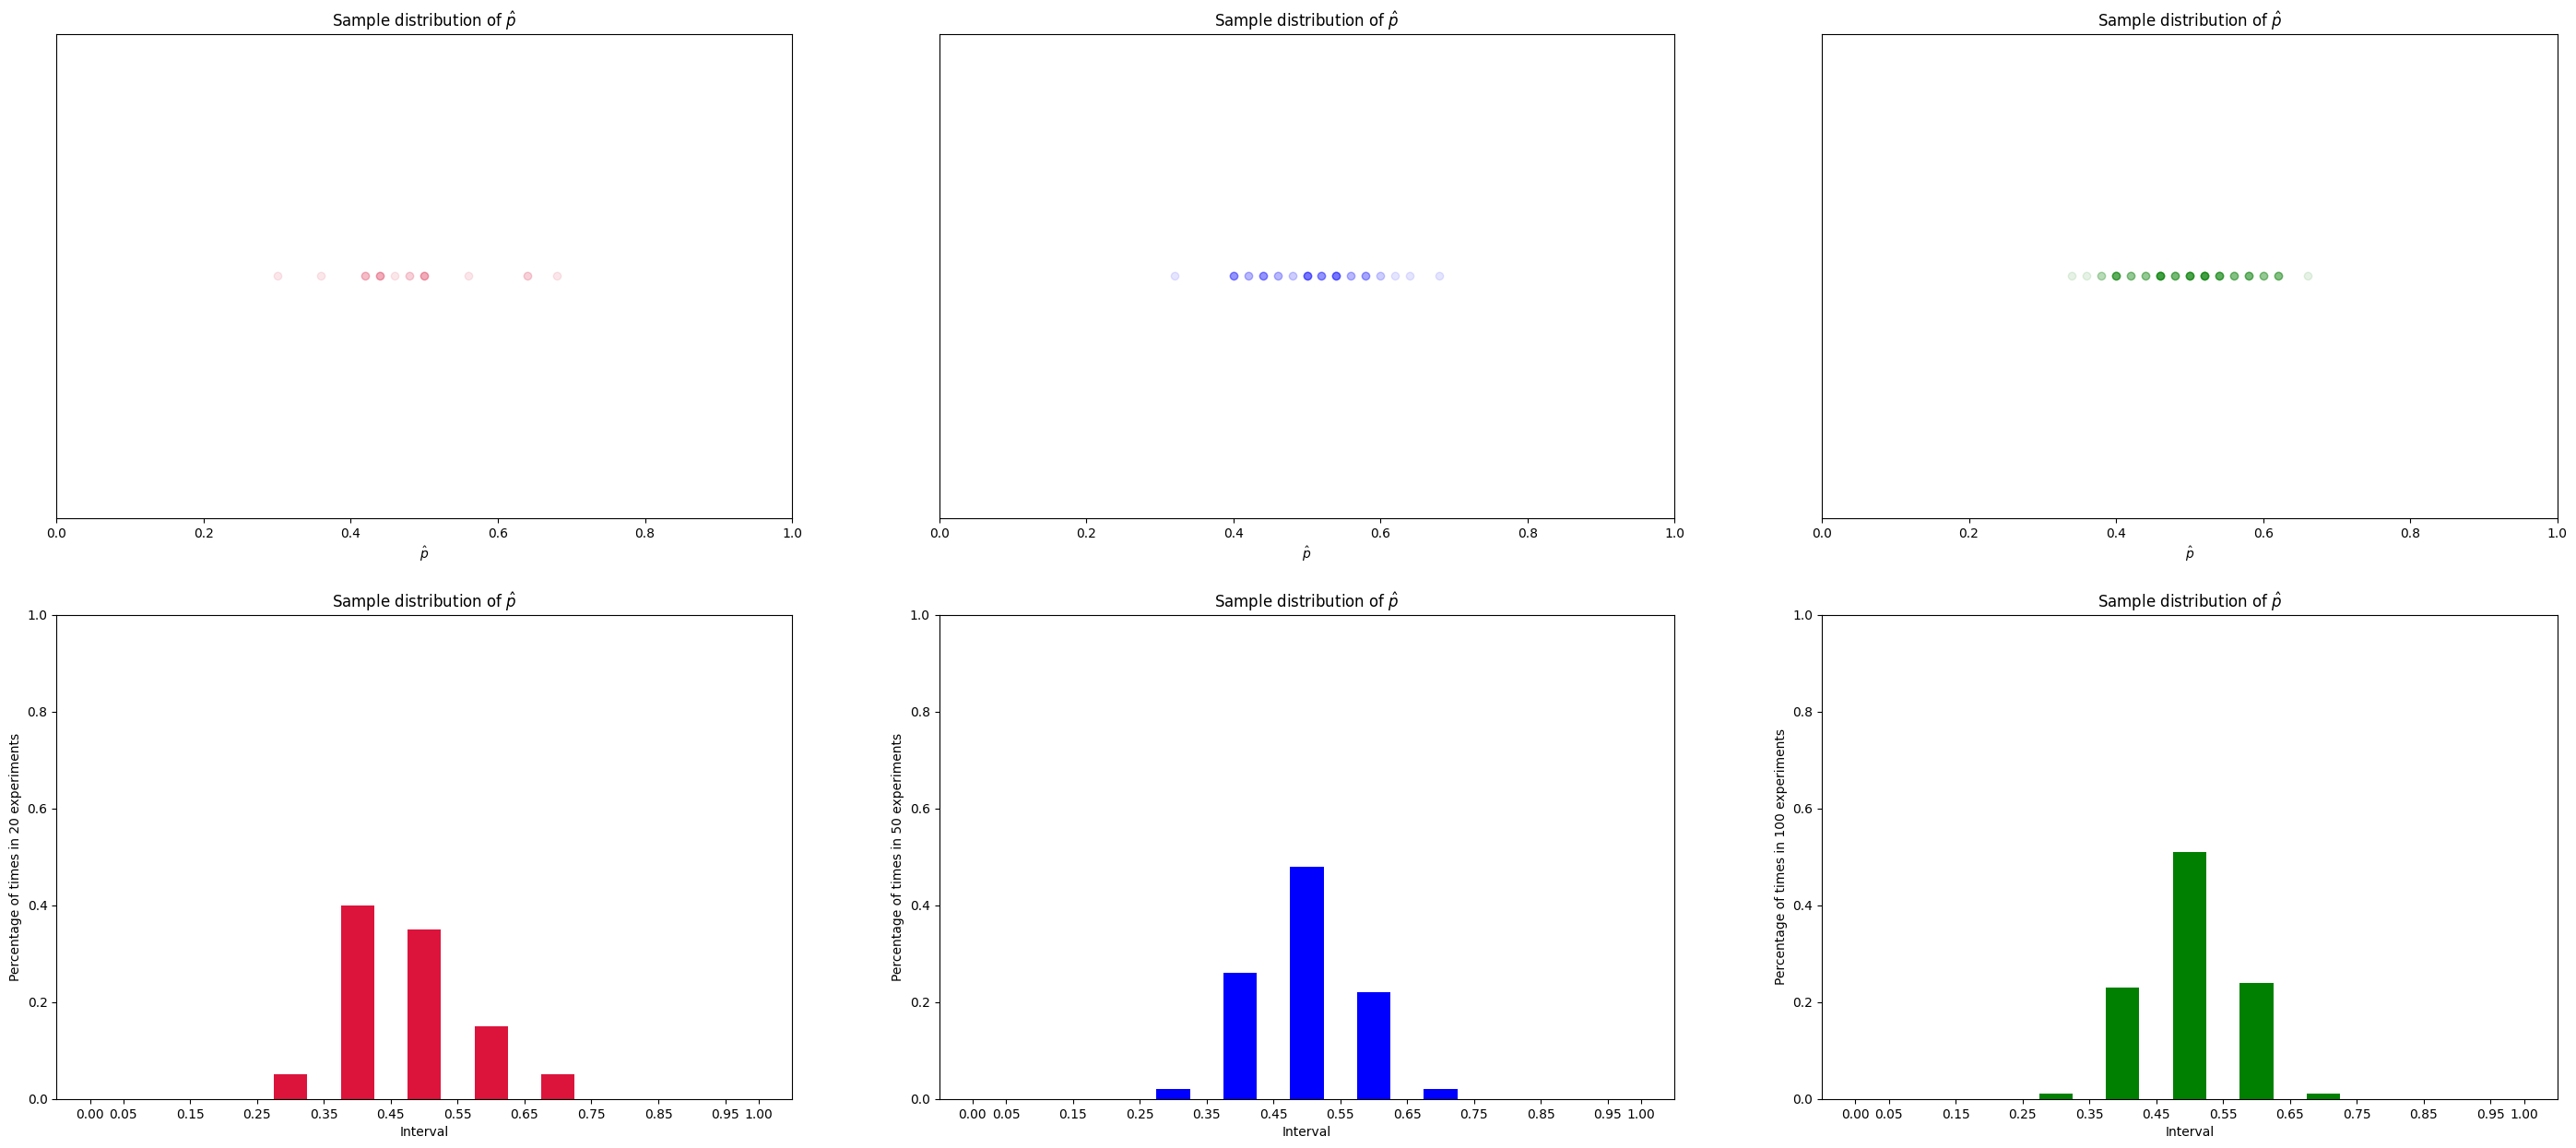

In [31]:
M = [20, 50, 100]
S_ks = []
breakpoints = [0] + [i / 100 for i in range(5, 100, 10)] + [1]
interval_proportions = list()
n = 50
p = 1/2

for m in M:
    S_k = []
    for i in range(m):
        sample = bernoulli_sample(p, 50)
        S_k.append(cond_expected_value(sample, {}))
    S_ks.append(S_k)
    
    # Use numpy.histogram to count values in each interval
    interval_counts, _ = np.histogram(S_k, bins = breakpoints)
    interval_proportions.append(interval_counts/m)

#Plot a 1D scatterplot showing the sample distribution of the proportion estimator (p_hat)
plt.figure(figsize=(35,15))
colors = ['crimson', 'blue', 'green', 'purple']
for i in range(len(M)):
    plt.subplot(2,3,i+1)
    plt.plot(S_ks[i], [0]*M[i], 'o', color=colors[i], alpha=0.1)
    plt.xlabel(r'$\hat{p}$')
    plt.xlim(0,1)
    plt.ylim(-1,1)
    plt.title(r'Sample distribution of $\hat{p}$')
    plt.yticks([])


#Plot a 2D histogram showing the sample distribution of the proportion estimator (p_hat)
for i in range(len(M)):
    # Generate the x-axis values for the intervals (for visualization purposes the middle of each interval is chosen to represent the interval)
    x_values = [(breakpoints[j] + breakpoints[j + 1]) / 2 for j in range(len(breakpoints) - 1)]

    # Plot the histogram
    plt.subplot(2,3,i+4)
    plt.bar(x_values, interval_proportions[i], width=0.05, align='center', color=colors[i])
    plt.xlabel('Interval')
    plt.ylabel('Percentage of times in {0} experiments'.format(M[i]))
    plt.ylim(0,1)
    plt.title(r'Sample distribution of $\hat{p}$')
    plt.xticks(breakpoints)

plt.show()

The Law of Large Numbers highlights that as we increase the number of samples (iterations) in an experiment, the sample mean approaches the expected value. As it becomes evident, in this case where the expected value is $p=\frac{1}{2}$, the Law of Large Numbers seems to be confirmed as the sample means $S_k$ seem to converge to this value as we increase M!

For visualization purposes we also plot the difference $|p - E(S_k)|$ for increasing values of M. We can observe below that as M increases $E(S_k)$ approximates more and more the expected value $p=\frac{1}{2}$,  and therefore $|p - E(S_k)| \rightarrow 0$ 

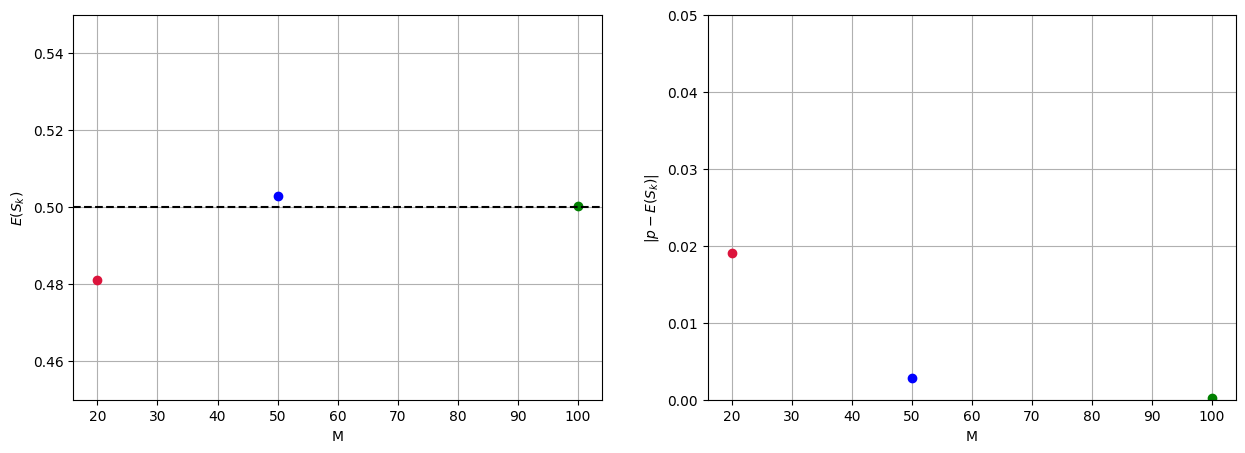

In [48]:
#Plot the error given that the expected (theoretical) value for the sample mean of the proportion estimator (p_hat) is p=1/2, as p_hat is an unbiased estimator
plt.figure(figsize=(15,5))
for i in range(len(M)):
    plt.subplot(1,2,1)
    plt.plot(M[i], np.mean(S_ks[i]), 'o', color=colors[i])
    plt.ylim(p-0.05, p+0.05)
    plt.xlabel(r'M')
    plt.ylabel(r'$E(S_k)$')
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(M[i], np.abs(p-np.mean(S_ks[i])), 'o', color=colors[i])
    plt.ylim(0, 0.05)
    plt.xlabel(r'M')
    plt.ylabel(r'$|p - E(S_k)|$')
    plt.grid(True)

plt.subplot(1,2,1)
plt.axhline(y=0.5, color='black', linestyle='--')

plt.show()